In [1]:
# Please, always put this cell on top of any Notebook you make.
# It replaces the former cells with Google Drive mounting and change directory.
# Using the code in this cell ensures that the Notebook is easy to run on Google Colab and on Jupyter Lab alike.
import os

def init_google_colab(gpath = '/content/gdrive/MyDrive/Assignment-Semester-7/NLP/Assignment-1'):
    """If in Google Colab, switch to relevant working directory

    Returns:
    --------
    bool    True if running in Google Colab, False if not.
    """
    in_google_colab = False
    try:
        from google.colab import drive
        in_google_colab = True
    except:
        pass
    if in_google_colab:
        drive.mount("/content/gdrive")
        os.chdir(gpath)
    return in_google_colab

init_google_colab('/content/gdrive/MyDrive/Assignment-Semester-7/NLP/Assignment-1')

Mounted at /content/gdrive


True

In [2]:
import pandas as pd
import nltk
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
data = pd.read_csv('assignment1_training_data.txt', sep = "\n", names = ['text'])
train_data_labelled = pd.read_csv('assignment1_training_data_labels.txt', sep = "\n", names = ['sentiment'])
data['sentiment'] = train_data_labelled
data

,text,sentiment
0,Merrill Lynch analyst Campbell Morgan upgraded...,positive
1,Eriikka S+Âderstr+Âm has previously held sever...,neutral
2,The webcast may be followed online on the comp...,neutral
3,"Typical end-uses include roof structures , flo...",neutral
4,The sale will be finalized in September or Oct...,neutral
...,...,...
1806,With this appointment Kaupthing Bank aims to f...,positive
1807,Jon Risfelt has previously held operational ex...,neutral
1808,The group intends to relocate warehouse and of...,neutral
1809,"The contract includes software licences , appl...",neutral


In [4]:
test_data = pd.read_csv('assignment1_test_data.txt', sep = "\n", names = ['text'])
test_data

,text
0,The company 's operating income ( EBIT ) total...
1,"Glaston 's own glass processing unit , Tamglas..."
2,"In September alone , the market declined by 10..."
3,Goodwill and other intangible assets account f...
4,Major Order in India Comptel Corporation has r...
...,...
448,"Cargo traffic fell 1 % year-on-year to 8,561 t..."
449,The value of the orders is over EUR 10mn .
450,"The sellers include 40 shareholders , includin..."
451,"In Sweden , operating profit for the period un..."


In [5]:
data.groupby('sentiment').describe()

text                                                               
          count unique                                                top freq
sentiment                                                                     
negative    242    242  However , the growth margin slowed down due to...    1
neutral    1113   1110  SSH Communications Security Corporation is hea...    2
positive    456    456  Merrill Lynch analyst Campbell Morgan upgraded...    1

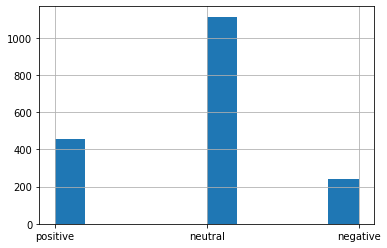

In [6]:
data.sentiment.hist()


In [7]:
sent = pd.DataFrame(data.sentiment.value_counts()).rename({'sentiment':'Number'},axis=1)
sent_p=pd.DataFrame(data.sentiment.value_counts()/len(data)).rename({'sentiment':'Probability'},axis=1)
pd.concat([sent, sent_p], axis =1)

,Number,Probability
neutral,1113,0.614578
positive,456,0.251795
negative,242,0.133628


In [8]:
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)

In [9]:
nb_clf = MultinomialNB()
clf_parameters = {
    'clf__alpha':(0,1),
    }  


            
#Feature Extraction
pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
    ('feature_selector',SelectKBest(chi2, k=1000)),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', nb_clf),
    ]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train, y_train)     
nb_clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(nb_clf)

predicted = nb_clf.predict(x_test)
y_pred_nb =list(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=3, ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7f311212e680>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0))])


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [10]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

    negative       0.77      0.58      0.66        52
     neutral       0.87      0.93      0.90       217
    positive       0.77      0.77      0.77        94

    accuracy                           0.83       363
   macro avg       0.80      0.76      0.77       363
weighted avg       0.83      0.83      0.83       363



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


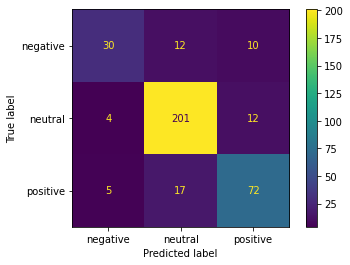

In [11]:
plot_confusion_matrix(nb_clf, x_test, y_test)

In [12]:
lr = LogisticRegression()


clf_parameters = {
    'clf__solver':('newton-cg','lbfgs','liblinear'),
    }  


            
#Feature Extraction
pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
    ('feature_selector',SelectKBest(chi2, k=1000)),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', lr),
    ]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train, y_train)     
lr= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(lr)

predicted = lr.predict(x_test)
y_pred_lr =list(predicted)

print(accuracy_score(y_test,y_pred_lr)*100)

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=2, ngram_range=(1, 3),
                                 token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7f311212e680>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='newton-cg'))])
85.67493112947659


In [13]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

    negative       1.00      0.50      0.67        52
     neutral       0.84      1.00      0.91       217
    positive       0.85      0.73      0.79        94

    accuracy                           0.86       363
   macro avg       0.90      0.74      0.79       363
weighted avg       0.87      0.86      0.85       363



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


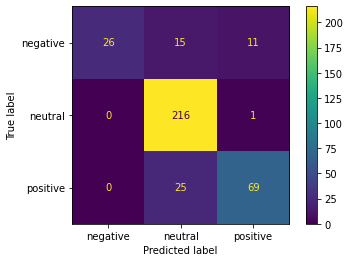

In [14]:
plot_confusion_matrix(lr, x_test, y_test)

In [15]:
svc = SVC()

clf_parameters = {
    'clf__kernel':('linear','poly','rbf','sigmoid','precomputed')
    }  


            
#Feature Extraction
pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
    ('feature_selector',SelectKBest(chi2, k=1000)),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', svc),
    ]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train, y_train)     
svc= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(svc)

predicted = svc.predict(x_test)
y_pred_svc =list(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 177, in fit
    raise TypeError("Sparse precomputed kernels are not supported.")
TypeError: Spa

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=3, ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7f311212e680>)),
                ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear'))])


In [16]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

    negative       0.97      0.56      0.71        52
     neutral       0.85      0.98      0.91       217
    positive       0.84      0.74      0.79        94

    accuracy                           0.86       363
   macro avg       0.89      0.76      0.80       363
weighted avg       0.87      0.86      0.85       363



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


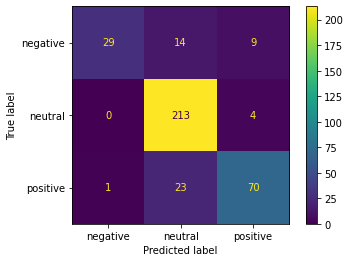

In [17]:
plot_confusion_matrix(svc, x_test, y_test)


In [18]:
print(confusion_matrix(y_test, y_pred_lr));

[[ 26  15  11]
 [  0 216   1]
 [  0  25  69]]


In [19]:
print(confusion_matrix(y_test, y_pred_nb));

[[ 30  12  10]
 [  4 201  12]
 [  5  17  72]]


In [20]:
print(confusion_matrix(y_test, y_pred_svc));

[[ 29  14   9]
 [  0 213   4]
 [  1  23  70]]


In [21]:
from sklearn.preprocessing import FunctionTransformer

In [22]:
rf = RandomForestClassifier(class_weight='balanced') 
clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),   
            'clf__n_estimators':(50,100),
            'clf__max_depth':(10,50,100),
            }

# Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer()),
('feature_selector', SelectKBest(chi2, k=1000)),     
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)), 
('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),    
('clf', rf),])
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train, y_train)     
rf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(rf)

predicted = rf.predict(x_test)
y_pred_rf =list(predicted)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarn

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(min_df=3, ngram_range=(1, 3))),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7f311212e680>)),
                ('tfidf', TfidfTransformer()),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7f3111266320>)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=100,
                                        max_features='sqrt'))])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [23]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    negative       0.92      0.44      0.60        52
     neutral       0.82      0.99      0.90       217
    positive       0.87      0.71      0.78        94

    accuracy                           0.84       363
   macro avg       0.87      0.72      0.76       363
weighted avg       0.85      0.84      0.83       363



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


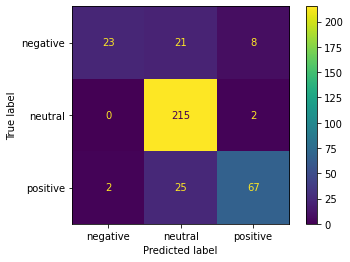

In [24]:
plot_confusion_matrix(rf, x_test, y_test)

In [25]:
dtc = DecisionTreeClassifier(random_state=40)
clf_parameters = {
'clf__criterion':('gini', 'entropy'), 
'clf__max_features':('auto', 'sqrt', 'log2'),
'clf__ccp_alpha':(0.001, 0.005, 0.01,0.1),
}



# Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer()),
('feature_selector', SelectKBest(chi2, k=1000)),     
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),   
#    ('to_dense',DenseTransformer()),    
('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),    
('clf', dtc),])
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train, y_train)
dtc= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(dtc)

predicted = dtc.predict(x_test)
y_pred_dtc =list(predicted)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarn

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(min_df=2, ngram_range=(2, 3))),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7f311212e680>)),
                ('tfidf', TfidfTransformer()),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7f3110c548c0>)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_features='auto',
                                        random_state=40))])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [26]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

    negative       0.60      0.50      0.55        52
     neutral       0.83      0.98      0.90       217
    positive       0.85      0.59      0.69        94

    accuracy                           0.81       363
   macro avg       0.76      0.69      0.71       363
weighted avg       0.80      0.81      0.79       363



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


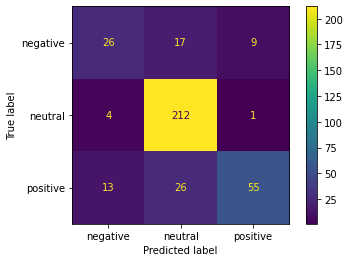

In [27]:
plot_confusion_matrix(dtc, x_test, y_test)

In [28]:
print(accuracy_score(y_test,y_pred_lr)*100)
print(accuracy_score(y_test,y_pred_nb)*100)
print(accuracy_score(y_test,y_pred_svc)*100)
print(accuracy_score(y_test,y_pred_rf)*100)
print(accuracy_score(y_test,y_pred_dtc)*100)

85.67493112947659
83.47107438016529
85.9504132231405
84.02203856749311
80.71625344352617


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [30]:
pr_lr=precision_score(y_test,y_pred_lr, average='micro') 
print ('\n Precision:'+str(pr_lr)) 

rl_lr=recall_score(y_test,y_pred_lr, average='micro') 
print ('\n Recall:'+str(rl_lr))

fm_lr=f1_score(y_test,y_pred_lr, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm_lr))

fmi_lr=f1_score(y_test,y_pred_lr, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fmi_lr))


 Precision:0.8567493112947658

 Recall:0.8567493112947658

 Macro Averaged F1-Score :0.7895191113795764

 Micro Averaged F1-Score:0.8567493112947658


In [31]:
pr_nb=precision_score(y_test,y_pred_nb, average='micro') 
print ('\n Precision:'+str(pr_nb)) 

rl_nb=recall_score(y_test,y_pred_nb, average='micro') 
print ('\n Recall:'+str(rl_nb))

fm_nb=f1_score(y_test,y_pred_nb, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm_nb))

fmi_nb=f1_score(y_test,y_pred_nb, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fmi_nb))


 Precision:0.8347107438016529

 Recall:0.8347107438016529

 Macro Averaged F1-Score :0.7748756550698576

 Micro Averaged F1-Score:0.8347107438016529


In [32]:
pr_svc=precision_score(y_test,y_pred_nb, average='micro') 
print ('\n Precision:'+str(pr_svc)) 

rl_svc=recall_score(y_test,y_pred_svc, average='micro') 
print ('\n Recall:'+str(rl_svc))

fm_svc=f1_score(y_test,y_pred_svc, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm_svc))

fmi_svc=f1_score(y_test,y_pred_svc, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fmi_svc))


 Precision:0.8347107438016529

 Recall:0.859504132231405

 Macro Averaged F1-Score :0.8034943641999844

 Micro Averaged F1-Score:0.859504132231405


In [33]:
pr_rf=precision_score(y_test,y_pred_rf, average='micro') 
print ('\n Precision:'+str(pr_rf)) 

rl_rf=recall_score(y_test,y_pred_rf, average='micro') 
print ('\n Recall:'+str(rl_rf))

fm_rf=f1_score(y_test,y_pred_rf, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm_rf))

fmi_rf=f1_score(y_test,y_pred_rf, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fmi_rf))


 Precision:0.8402203856749312

 Recall:0.8402203856749312

 Macro Averaged F1-Score :0.7602033061183028

 Micro Averaged F1-Score:0.8402203856749312


In [34]:
pr_dtc=precision_score(y_test,y_pred_dtc, average='micro') 
print ('\n Precision:'+str(pr_dtc)) 

rl_dtc=recall_score(y_test,y_pred_dtc, average='micro') 
print ('\n Recall:'+str(rl_dtc))

fm_dtc=f1_score(y_test,y_pred_dtc, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm_dtc))

fmi_dtc=f1_score(y_test,y_pred_dtc, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fmi_dtc))


 Precision:0.8071625344352618

 Recall:0.8071625344352618

 Macro Averaged F1-Score :0.7124991350564879

 Micro Averaged F1-Score:0.8071625344352618


In [35]:
test_prediction = svc.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


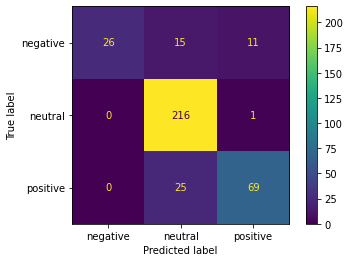

In [36]:
plot_confusion_matrix(lr, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


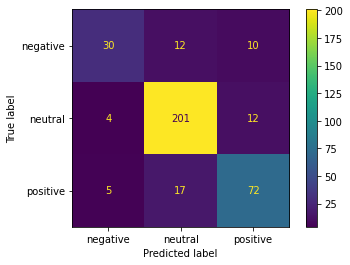

In [37]:

plot_confusion_matrix(nb_clf, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


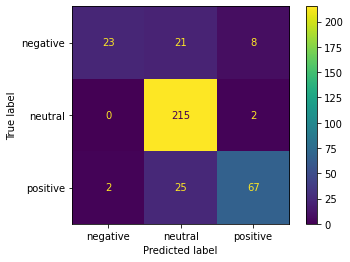

In [38]:

plot_confusion_matrix(rf, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


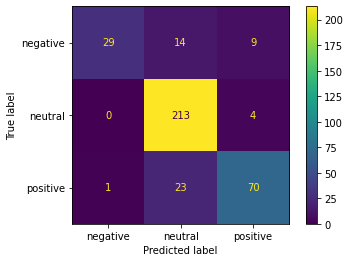

In [39]:

plot_confusion_matrix(svc, x_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


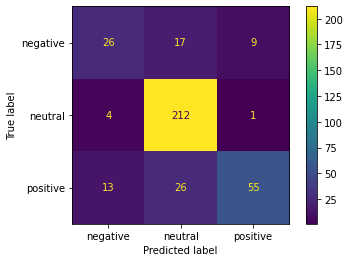

In [40]:
plot_confusion_matrix(dtc, x_test, y_test)

In [41]:
lst=[]
data1 = pd.read_csv('assignment1_test_data.txt', sep = "\n", names = ['text'])
test=data1.text
predicted = rf.predict(test)
lst =list(predicted)
print(lst)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


['positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'positive', 'neutral', 'posi

In [42]:
import pandas as pd  

df = pd.DataFrame(lst)
df.to_csv('ankit_lade_txt.txt', index=False)

In [43]:
test_data_labelled = pd.read_csv('assignment1_test_data_labels.txt', sep = "\n", names = ['sentiment'])

In [44]:
print(classification_report(test_data_labelled, lst))

              precision    recall  f1-score   support

    negative       0.93      0.66      0.77        61
     neutral       0.86      0.99      0.92       278
    positive       0.86      0.69      0.77       114

    accuracy                           0.87       453
   macro avg       0.88      0.78      0.82       453
weighted avg       0.87      0.87      0.86       453

